<a href="https://colab.research.google.com/github/Marlianur09/Tugas_Praktikum_023_043/blob/main/Klasifikasi_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle==1.5.8

In [2]:
!pip install opendatasets

In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/c/aptos2019-blindness-detection")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: muhammadmarlianur
Your Kaggle Key: ··········


100%|███████████████████████████████████████████████████████████████████████████| 9.51G/9.51G [1:21:49<00:00, 2.08MB/s]



Extracting archive .\aptos2019-blindness-detection/aptos2019-blindness-detection.zip to .\aptos2019-blindness-detection


In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [7]:
train_dir = 'aptos2019-blindness-detection/train_images'
test_dir = 'aptos2019-blindness-detection/test_images'

In [8]:
train_csv=pd.read_csv('aptos2019-blindness-detection/train.csv')
test_csv=pd.read_csv('aptos2019-blindness-detection/test.csv')

In [9]:
train=[]
trainlabel=[]
for im in tqdm(os.listdir(train_dir)):
    image=load_img(os.path.join(train_dir,im), grayscale=False, color_mode='rgb', target_size=(60,60))
    image=img_to_array(image)
    image=image/255.0
    train+=[image]
    trainlabel+=[train_csv[train_csv['id_code']==im[0:-4]]['diagnosis'].iat[0]]

100%|██████████████████████████████████████████████████████████████████████████████| 3662/3662 [05:00<00:00, 12.20it/s]


In [80]:
test=[]
for im in tqdm(os.listdir(test_dir)):
    image=load_img(os.path.join(test_dir,im), grayscale=False, color_mode='rgb', target_size=(60,60))
    image=img_to_array(image)
    image=image/255.0
    test+=[image]


100%|██████████████████████████████████████████████████████████████████████████████| 1928/1928 [00:51<00:00, 37.42it/s]


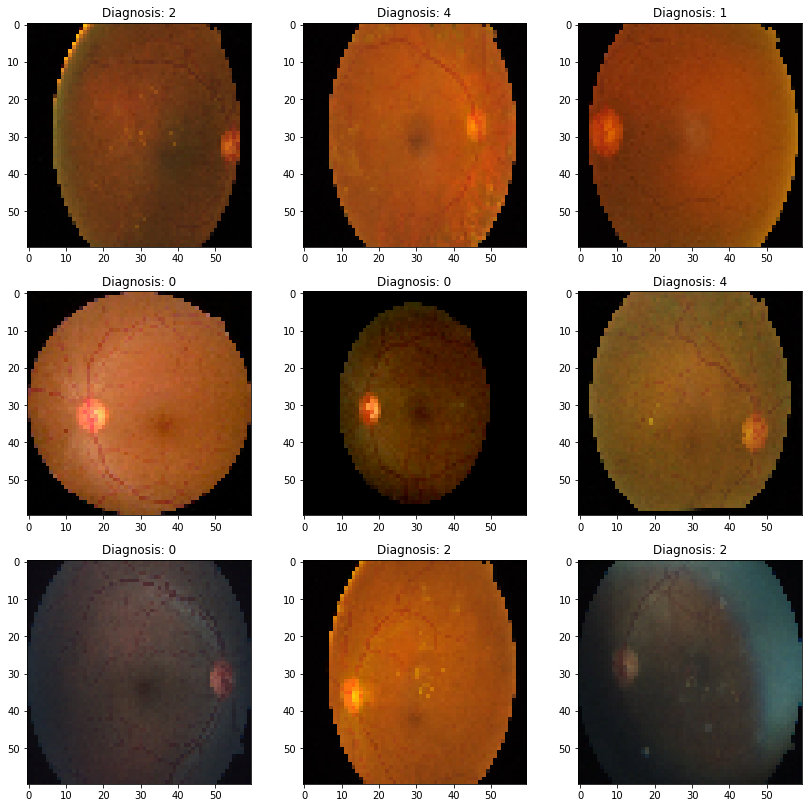

In [11]:
fig,axs = plt.subplots(3,3,figsize=(14,14))
for i in range(9):
    r=i//3
    c=i%3
    ax=axs[r][c].imshow(train[i])
    ax=axs[r][c].set_title('Diagnosis: '+str(trainlabel[i]))    
plt.show()

In [12]:
train=np.array(train)
trainlabel=np.array(trainlabel)
test=np.array(test)

In [13]:
trainlabel2=to_categorical(trainlabel)

In [14]:
trainx,testx,trainy,testy=train_test_split(train,trainlabel2,test_size=0.2,random_state=44)

In [15]:
datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             rotation_range=20,
                             zoom_range=0.2,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.1,
                             fill_mode="nearest")

In [22]:
from tensorflow.keras.layers import BatchNormalization
# TULIS KODE ANDA DISINI
model = tf.keras.models.Sequential([
    # Konvulasi Pertama
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Konvulasi Kedua
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    # Jadikan hasil yang sudah diperoleh dalam sebuah DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # Hidden Layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(5, activation='softmax')
])



In [23]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
print(trainx.shape)
print(trainy.shape)

(2929, 60, 60, 3)
(2929, 5)


In [25]:
print(testx.shape)
print(testy.shape)

(733, 60, 60, 3)
(733, 5)


In [26]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=100)

Epoch 1/100
92/92 [==============================] - 21s 216ms/step - loss: 1.4723 - accuracy: 0.5306 - val_loss: 1.6088 - val_accuracy: 0.2292
Epoch 2/100
92/92 [==============================] - 20s 218ms/step - loss: 1.0406 - accuracy: 0.6299 - val_loss: 2.0125 - val_accuracy: 0.2497
Epoch 3/100
92/92 [==============================] - 21s 227ms/step - loss: 0.9568 - accuracy: 0.6637 - val_loss: 2.1706 - val_accuracy: 0.2278
Epoch 4/100
92/92 [==============================] - 21s 230ms/step - loss: 0.8965 - accuracy: 0.6719 - val_loss: 1.4016 - val_accuracy: 0.3097
Epoch 5/100
92/92 [==============================] - 19s 206ms/step - loss: 0.8884 - accuracy: 0.6815 - val_loss: 1.5029 - val_accuracy: 0.3206
Epoch 6/100
92/92 [==============================] - 19s 204ms/step - loss: 0.8892 - accuracy: 0.6815 - val_loss: 1.0078 - val_accuracy: 0.6739
Epoch 7/100
92/92 [==============================] - 20s 218ms/step - loss: 0.8708 - accuracy: 0.6886 - val_loss: 1.1749 - val_accuracy:

In [63]:
from keras.models import save_model
model.save('model/Moduul3/model3.1.h5')

In [68]:
from tensorflow.keras.layers import BatchNormalization
# TULIS KODE ANDA DISINI
model2 = tf.keras.models.Sequential([
    # Konvulasi Pertama
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Konvulasi Kedua
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    # Konvulasi Ketiga
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    # Konvulasi Keempat
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    # Jadikan hasil yang sudah diperoleh dalam sebuah DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # Hidden Layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(5, activation='softmax')
])




In [75]:
from tensorflow.keras.optimizers import Adam
model2.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [76]:
his2=model2.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=100)

Epoch 1/100
92/92 [==============================] - 20s 205ms/step - loss: 1.4562 - accuracy: 0.4759 - val_loss: 2.0533 - val_accuracy: 0.2483
Epoch 2/100
92/92 [==============================] - 18s 192ms/step - loss: 1.1497 - accuracy: 0.5988 - val_loss: 2.7664 - val_accuracy: 0.1037
Epoch 3/100
92/92 [==============================] - 18s 192ms/step - loss: 1.0675 - accuracy: 0.6139 - val_loss: 2.3869 - val_accuracy: 0.1583
Epoch 4/100
92/92 [==============================] - 18s 191ms/step - loss: 1.0116 - accuracy: 0.6412 - val_loss: 1.9941 - val_accuracy: 0.2660
Epoch 5/100
92/92 [==============================] - 18s 191ms/step - loss: 0.9692 - accuracy: 0.6538 - val_loss: 1.5262 - val_accuracy: 0.3656
Epoch 6/100
92/92 [==============================] - 19s 209ms/step - loss: 0.9409 - accuracy: 0.6664 - val_loss: 0.9054 - val_accuracy: 0.6835
Epoch 7/100
92/92 [==============================] - 19s 211ms/step - loss: 0.9304 - accuracy: 0.6729 - val_loss: 1.1528 - val_accuracy:

In [81]:
model2.save('model/Moduul3/model3.2.h5')

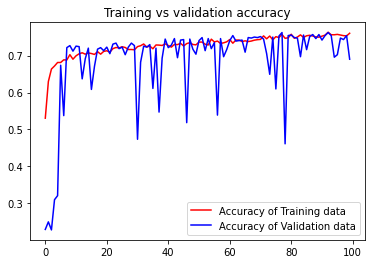

<Figure size 432x288 with 0 Axes>

In [40]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

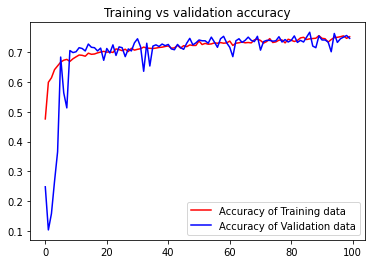

<Figure size 432x288 with 0 Axes>

In [82]:
get_acc2 = his2.history['accuracy']
value_acc2 = his2.history['val_accuracy']
get_loss2 = his2.history['loss']
validation_loss2 = his2.history['val_loss']

epochs = range(len(get_acc2))
plt.plot(epochs, get_acc2, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc2, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

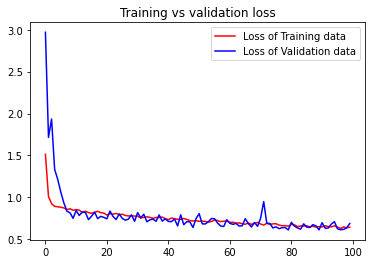

<Figure size 432x288 with 0 Axes>

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

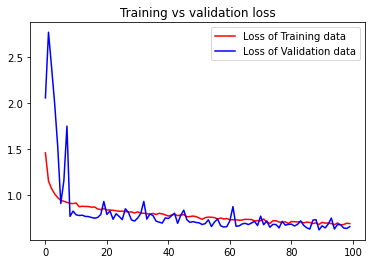

<Figure size 432x288 with 0 Axes>

In [83]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss2, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss2, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [95]:
train_x=np.array(trainx)
test_x=np.array(testx)

test_y=datagen

In [85]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [104]:
from sklearn.metrics import classification_report

pred = model.predict(testx)
labels = pred > 0.5

print(classification_report(testy, labels))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90       373
           1       0.78      0.10      0.18        70
           2       0.47      0.93      0.62       182
           3       1.00      0.04      0.08        46
           4       0.50      0.03      0.06        62

   micro avg       0.71      0.66      0.68       733
   macro avg       0.75      0.39      0.37       733
weighted avg       0.80      0.66      0.64       733
 samples avg       0.66      0.66      0.66       733



c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [108]:
from sklearn.metrics import classification_report

pred = model2.predict(testx)
labels = pred > 0.5

print(classification_report(testy, labels))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       373
           1       0.57      0.06      0.10        70
           2       0.57      0.54      0.55       182
           3       0.75      0.07      0.12        46
           4       0.00      0.00      0.00        62

   micro avg       0.84      0.64      0.72       733
   macro avg       0.57      0.33      0.35       733
weighted avg       0.74      0.64      0.65       733
 samples avg       0.64      0.64      0.64       733



c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
